In [1]:
%matplotlib inline

import sqlite3
import pandas as pd #for data frames
import numpy as np #numpy array operations
import nltk #natural lang processing, for processing text
import string
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import pickle
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
df = pd.read_csv('oneMonthData.csv')

In [32]:
df.shape

(43, 20)

In [33]:
len(df)
df.head()

,DATE,Future Index Long FII,Future Index Short FII,Option Index Call Long FII,Option Index Put Long FII,Option Index Call Short FII,Option Index Put Short FII,Future Index Long PRO,Future Index Short PRO,Option Index Call Long PRO,Option Index Put Long PRO,Option Index Call Short PRO,Option Index Put Short PRO,Future Index Long CLIENTS,Future Index Short CLIENTS,Option Index Call Long CLIENTS,Option Index Put Long CLIENTS,Option Index Call Short CLIENTS,Option Index Put Short CLIENTS,ACTUAL
0,23-02-2018,69441.0,79021.0,183383.0,264919.0,86845.0,111480.0,20632.0,18905.0,139394.0,152384.0,203732.0,181494.0,222689.0,178454.0,375805.0,581393.0,468931.0,771058.0,BULLISH
1,26-02-2018,82284.0,79312.0,188695.0,281843.0,88012.0,117379.0,20479.0,18829.0,133212.0,151958.0,209666.0,211901.0,221968.0,189077.0,412362.0,655109.0,497517.0,826298.0,BULLISH
2,27-02-2018,90876.0,79274.0,193113.0,293639.0,88885.0,121054.0,21397.0,22438.0,131698.0,165524.0,241660.0,209898.0,221750.0,193131.0,500391.0,639892.0,555584.0,836871.0,BEARISH
3,28-02-2018,87879.0,80942.0,200697.0,305923.0,88054.0,127073.0,21340.0,25420.0,132226.0,174034.0,268331.0,216171.0,228097.0,193438.0,570581.0,648818.0,608046.0,854949.0,BULLISH
4,01-03-2018,82864.0,84604.0,208838.0,300873.0,92974.0,126181.0,24174.0,30283.0,125610.0,162588.0,260738.0,175851.0,247887.0,197418.0,501669.0,561607.0,543331.0,795055.0,BEARISH


In [34]:
# making BULLISH = 1 and  BERISH = 0

for i in range(0,len(df)):
    if(df['ACTUAL'][i] == 'BULLISH'):
        df['ACTUAL'][i]=1
    else:
        df['ACTUAL'][i]=0


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [35]:
df


,DATE,Future Index Long FII,Future Index Short FII,Option Index Call Long FII,Option Index Put Long FII,Option Index Call Short FII,Option Index Put Short FII,Future Index Long PRO,Future Index Short PRO,Option Index Call Long PRO,Option Index Put Long PRO,Option Index Call Short PRO,Option Index Put Short PRO,Future Index Long CLIENTS,Future Index Short CLIENTS,Option Index Call Long CLIENTS,Option Index Put Long CLIENTS,Option Index Call Short CLIENTS,Option Index Put Short CLIENTS,ACTUAL
0,23-02-2018,69441.0,79021.0,183383.00,264919.0,86845.00,111480.0,20632.0,18905.0,139394.00,152384.0,203732.0,181494.0,222689.0,178454.0,375805.0,581393.00,468931.00,771058.00,1
1,26-02-2018,82284.0,79312.0,188695.00,281843.0,88012.00,117379.0,20479.0,18829.0,133212.00,151958.0,209666.0,211901.0,221968.0,189077.0,412362.0,655109.00,497517.00,826298.00,1
2,27-02-2018,90876.0,79274.0,193113.00,293639.0,88885.00,121054.0,21397.0,22438.0,131698.00,165524.0,241660.0,209898.0,221750.0,193131.0,500391.0,639892.00,555584.00,836871.00,0
3,28-02-2018,87879.0,80942.0,200697.00,305923.0,88054.00,127073.0,21340.0,25420.0,132226.00,174034.0,268331.0,216171.0,228097.0,193438.0,570581.0,648818.00,608046.00,854949.00,1
4,01-03-2018,82864.0,84604.0,208838.00,300873.0,92974.00,126181.0,24174.0,30283.0,125610.00,162588.0,260738.0,175851.0,247887.0,197418.0,501669.0,561607.00,543331.00,795055.00,0
5,05-03-2018,77376.0,97787.0,221559.00,314324.0,101847.00,125512.0,24205.0,31754.0,135461.00,170657.0,296488.0,191591.0,259914.0,190073.0,581165.0,584293.00,600776.00,824639.00,0
6,06-03-2018,84617.0,100442.0,230580.00,330959.0,114766.00,126235.0,25848.0,37530.0,149901.00,174936.0,344670.0,191452.0,273254.0,202205.0,684823.0,569619.00,666794.00,830995.00,0
7,07-03-2018,98122.0,111267.0,225401.00,338544.0,124292.00,127937.0,25951.0,35902.0,177291.00,173512.0,398731.0,198225.0,261660.0,203602.0,789425.0,602929.00,730020.00,863524.00,0
8,08-03-2018,106181.0,115830.0,219617.00,339274.0,117915.00,125248.0,20165.0,33721.0,152499.00,148389.0,315510.0,193021.0,252912.0,203676.0,597456.0,575846.00,597073.00,833810.00,1
9,09-03-2018,106815.0,113652.0,226599.00,349983.0,129808.00,131111.0,19270.0,36784.0,160863.00,152551.0,329242.0,207200.0,248688.0,211019.0,649240.0,594325.00,638578.00,847649.00,0


In [54]:
#creating odd list of vals for 'k'


def k_fold_cross_validation(x_mat,y_vec):
    li = list(range(0,11))
    neighbors = list(filter(lambda x: x%2 != 0,li))

    #empty list to hold CV scores/accuracy
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
        scores = cross_val_score(knn, x_mat, y_vec, cv=3, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, MSE)

    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    print('*********************************************************************')
    print("optimal k value is: ",optimal_k)
    return optimal_k;

In [55]:
# Total data frame
x = np.array(df.iloc[:,1:19])

# this is only Actual Result i.e bullish or berish 
y = np.array(df['ACTUAL'])

y=y.astype('int')

In [59]:
#splitting the train and test data

x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.2, random_state=0)

y_1=y_1.astype('int')


The optimal number of neighbors is 9.


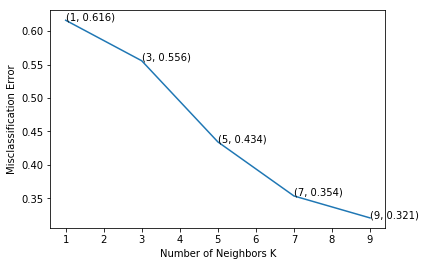

the misclassification error for each k value is :  [0.616 0.556 0.434 0.354 0.321]
*********************************************************************
optimal k value is:  9


In [60]:

optim_k_val = k_fold_cross_validation(x_1,y_1)

In [61]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optim_k_val, acc))


The accuracy of the knn classifier for k = 9 is 55.555556%


# 19th april 2018 data in sheet

In [21]:

new_x = np.array([[91849.00,148373.00,241238.00,400176.00,89709.00,187460.00,21931.00,48556.00,171927.00,161086.00,238136.00,305725.00,301846.00,187424.00,412474.00,786880.00,559080.00,937325.00
]])

In [22]:
new_x

array([[ 91849., 148373., 241238., 400176.,  89709., 187460.,  21931.,
         48556., 171927., 161086., 238136., 305725., 301846., 187424.,
        412474., 786880., 559080., 937325.]])

In [23]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)

# fitting the model
knn_optimal.fit(x, y)

# predict the response
pred = knn_optimal.predict(new_x)

In [24]:
pred[0]

1

###  Observation: we got 1 i.e bullish and the actual value is also bullish so it predicted correctly

# 30th April 2018 Data From Sheet

In [62]:

new_x = np.array([[90701,66765,200871,305893,80007,114973,16825,51016,153001,150347,145064,227497,259174,198130,340101,636985,528848,829683
]])

In [78]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)

# fitting the model
knn_optimal.fit(x, y)

# predict the response
pred = knn_optimal.predict(new_x)

In [79]:
pred[0]

1